In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn 

from sklearn import datasets, linear_model, metrics, tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import ElasticNet, Lasso,  RidgeCV

from sklearn.neighbors import KNeighborsRegressor

        
# Dataset splitting        
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV

# Errors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib



In [2]:
df_emi = pd.read_csv("dataset_scaled_emission.csv")
df_emi

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,...,x8_copper bromide,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,0,0,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.5,562.0,618
1,6,6,6,-0.336633,-0.679060,-0.100810,-0.220165,0.168592,-0.597456,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7,580.0,588
2,13,13,13,4.387509,1.135259,0.129412,-0.220165,4.855318,-0.800754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,555.0,595
3,15,15,15,-0.599085,-0.779855,0.120557,0.100853,-0.234173,-0.800754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26,584.0,615
4,16,16,16,-0.730311,-0.779855,0.120557,-0.220165,-0.344018,-0.800754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,460.0,480
5,32,32,32,0.057046,-0.527866,2.017988,-0.220165,0.315053,-0.800754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,532.0,591
6,59,59,59,-0.074180,-0.477469,0.120557,0.421871,0.205208,-0.800754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,430.0,477
7,60,60,60,-0.756556,-0.800014,-0.069186,-0.220165,-0.358664,-0.749929,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,460.0,590
8,67,67,67,0.450724,-0.377681,4.231657,-0.220165,0.644588,-0.800754,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,585.0,630
9,68,68,68,-0.336633,-0.477469,-0.322176,-0.220165,-0.453863,-0.600131,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,445.0,568


In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x7_None',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide',
             'abs_nm'
            ]

output_col = ['emission_nm']

X = df_emi[input_col]

Y = df_emi[output_col]

In [4]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [5]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 60, 2):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [12:08<00:00, 25.12s/it]

12.875 5 1 30


### 2. Decision Trees

In [6]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 28)):
    for j in range(1, 28):
        for k in range(4, 60, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 27/27 [02:10<00:00,  4.82s/it]

4.625 8 25 38


In [ ]:
DT_regr = DecisionTreeRegressor(max_depth=5,
                                max_features=9,
                                random_state=60)
            
DT_regr.fit(X_train, np.ravel(Y_train))
            
DT_Y_pred = B_regr.predict(X_test)
            
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
DT_mse = mean_squared_error(Y_test, DT_Y_pred)
print("Mean absolute error =", round(DT_mae,3), '\n' "Mean squared error =", round(DT_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, DT_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(DT_mae,3) , fontdict=None)
plt.show()

### 3. Random Forrest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [07:31<00:00, 15.56s/it]

10.666666666666671 6 1 10


In [15]:
RF_regr = RandomForestRegressor(max_depth=6, n_estimators=1, max_features=20, random_state=45)
RF_regr.fit(X_train, np.ravel(Y_train))
RF_Y_pred = RF_regr.predict(X_test)
mae = mean_absolute_error(Y_test, RF_Y_pred)
print(mae)

14.02307692307692


In [16]:
min_mae = 9999
min_a = 0
for a in tqdm(range(1,100)):
    RF_regr = RandomForestRegressor(max_depth=6, n_estimators=1, max_features=20, random_state=a)
    RF_regr.fit(X_train, np.ravel(Y_train))
    RF_Y_pred = RF_regr.predict(X_test)
    mae = mean_absolute_error(Y_test, RF_Y_pred)
    if (min_mae > mae):
        min_mae = mae
        min_a = a
print(min_mae, min_a)    

100%|██████████| 99/99 [00:00<00:00, 175.46it/s]

14.02307692307692 45


### 4. Extra Trees

In [8]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 34)):
    for j in range(1, 34):
        for k in range(2, 60, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 33/33 [20:05<00:00, 36.53s/it]

3.25 1 32 34


Mean absolute error = 3.25 
Mean squared error = 13.75


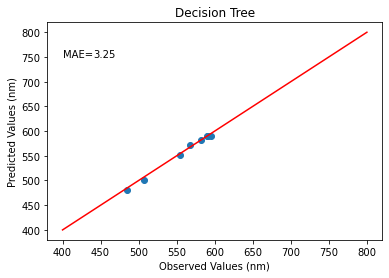

In [10]:
ET_regr = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=32,
                                            random_state=34)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
ET_mse = mean_squared_error(Y_test, ET_Y_pred)
print("Mean absolute error =", round(ET_mae,3), '\n' "Mean squared error =", round(ET_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, ET_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(ET_mae,3) , fontdict=None)
plt.show()

### 5. Gradient Boosting

In [9]:
min_mae = 999
min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
for i in tqdm(range(320, 400, 10)):
    for j in range(2, 24, 2):
        for k in np.arange(0.08, 0.22, 0.02):
            for l in range(2, 18, 4):
                GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
                GB_regr.fit(X_train, np.ravel(Y_train))
                GB_Y_pred = GB_regr.predict(X_test)

                mae = mean_absolute_error(Y_test, GB_Y_pred)
                if (min_mae > mae):
                    min_mae = mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(min_mae, min_i, min_j, min_k, min_l)

100%|██████████| 8/8 [08:23<00:00, 62.96s/it]

18.514535245824483 320 8 0.22000000000000003 10


In [ ]:
GB_regr = GradientBoostingRegressor(n_estimators=540, max_depth=4, learning_rate=0.18, random_state=67)

            
GB_regr.fit(X_train, np.ravel(Y_train))
            
GB_Y_pred = GB_regr.predict(X_test)
            
GB_mae = mean_absolute_error(Y_test, GB_Y_pred)
print("Mean absolute error =", round(GB_mae,3))

plt.figure()
plt.title("Gradient Boosting")
plt.plot(Y_test, GB_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(GB_mae,3) , fontdict=None)
plt.show()

### 6. Others

In [10]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  16.184615384615373 

Ridge
 MAE for diameter is  18.110791212932252 

Lasso
 MAE for diameter is  19.560952909058933 

ElasticNet
 MAE for diameter is  18.19936624046899 



## Conclusion

Decision Tree gave the best performance.

### Saving model

In [9]:
ET_regr = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=32,
                                            random_state=34)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
joblib.dump(ET_regr, "./model_aug_emission_ExtraTrees.joblib")


['./model_aug_emission_ExtraTrees.joblib']